# IMPORTING LIBRARIES 

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## IMPORTING DATASET 

In [34]:
data = pd.read_csv("Position_Salaries.csv")

## DATA LOOK-UP

In [35]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


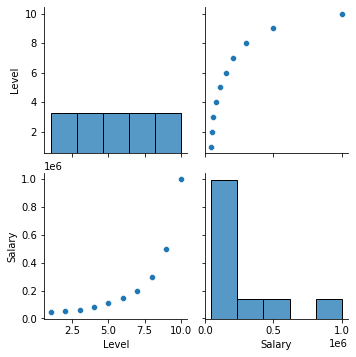

In [37]:
sns.pairplot(data)

# SIMPLE LINEAR REGRESSION:

In [38]:
X = data[["Level"]]

In [39]:
y = data[["Salary"]]

### TEST TRAIN SPLIT:

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)

### TRAINING LINEAR REGRESSION MODEL

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(X_train,y_train)

LinearRegression()

### EVALUATION TRAINED MODEL

In [45]:
predictions = lm.predict(X_test)

In [46]:
predictions

array([[ 44275.9295499 ],
       [543473.58121331]])

<AxesSubplot:ylabel='Count'>

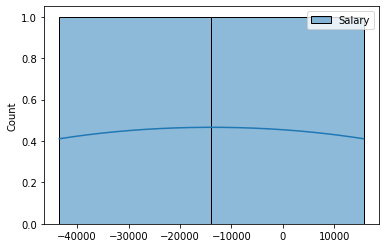

In [47]:
sns.histplot((y_test-predictions) , kde=True)

In [48]:
from sklearn import metrics

In [49]:
metrics.mean_absolute_error(y_test,predictions)

29598.82583170262

In [50]:
metrics.mean_squared_error(y_test,predictions)

1068599327.5148352

## POLYNOMIAL LINEAR REGRESSION

In [51]:
from sklearn.preprocessing import PolynomialFeatures

### TRAINING MODEL

In [57]:
poly_reg = PolynomialFeatures(degree=2)

In [58]:
X_poly_2 = poly_reg.fit_transform(X)

In [59]:
A_train , A_test , a_train , a_test = train_test_split(X_poly_2 ,y , train_size=0.8, random_state=0)

In [61]:
lm_2 = LinearRegression()
lm_2.fit(A_train,a_train)

LinearRegression()

### EVALUATING MODEL 

<AxesSubplot:ylabel='Count'>

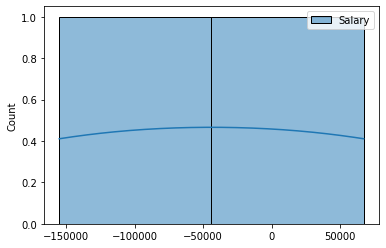

In [62]:
sns.histplot(a_test - lm_2.predict(A_test) , kde=True)

In [63]:
metrics.mean_squared_error(a_test,lm_2.predict(A_test))

14254734714.32907

In [64]:
metrics.mean_absolute_error(a_test,lm_2.predict(A_test))

111037.84403669718

# RESULT COMPARISON 

Text(0.5, 1.0, 'Fitting Simple Linear Regression')

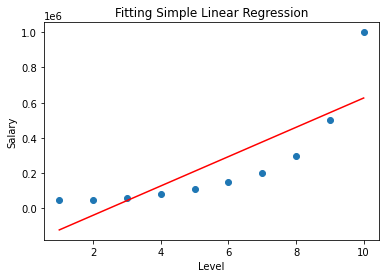

In [65]:
plt.scatter(X,y)
plt.plot(X.values , lm.predict(X) , color = "red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Fitting Simple Linear Regression")

Text(0, 0.5, 'Salary')

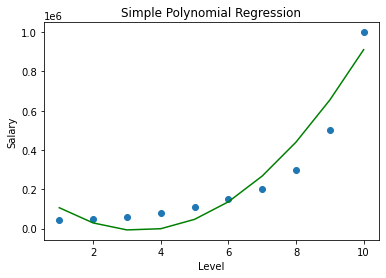

In [66]:
plt.scatter(X,y)
plt.plot(X.values , lm_2.predict(poly_reg.fit_transform(X)) , color = "green")
plt.title("Simple Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")

# Polynomial Regression:

### PRE-PROCESSING

In [67]:
poly_reg2 = PolynomialFeatures(degree=4)

In [68]:
X_poly_4 = poly_reg2.fit_transform(X)

In [69]:
B_train,B_test,b_train,b_test = train_test_split(X_poly_4,y, train_size=0.8,random_state=0)

### TRAINING:

In [70]:
lm_3 = LinearRegression()
lm_3.fit(B_train,b_train)

LinearRegression()

### EVALUATION:

In [71]:
preds = lm_3.predict(B_test)

In [72]:
b_test - lm_3.predict(B_test)

,Salary
2,-2618.489842
8,-54488.616835


<AxesSubplot:ylabel='Count'>

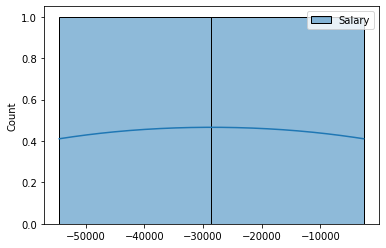

In [73]:
sns.histplot((b_test-preds),kde = True)

Text(0, 0.5, 'Salary')

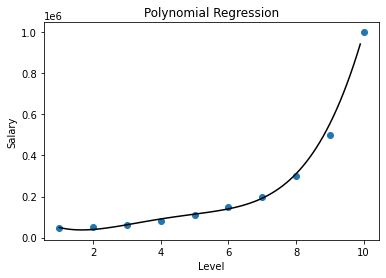

In [74]:
X_grid = np.arange(min(X.values) , max(X.values) , 0.1)
X_grid = X_grid.reshape((len(X_grid) , 1))
plt.scatter(X,y)
plt.plot(X_grid , lm_3.predict(poly_reg2.fit_transform(X_grid)) , color = "black")
plt.title("Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")

In [75]:
metrics.mean_absolute_error(b_test,preds)

28553.553338500744

In [76]:
metrics.mean_squared_error(b_test,preds)

1487932926.7969952

# PREDICTING NEW VALUES:

In [77]:
to_predict = pd.DataFrame(data=[6.5] , columns = ["Level"])

In [78]:
to_predict

,Level
0,6.5


### LINEAR REGRESSION PREDICTIONS

In [79]:
lm.predict(to_predict)

array([[335474.55968689]])

### POLYNOMIAL LINEAR REGRESSION PREDICTIONS

In [80]:
lm_2.predict(poly_reg.fit_transform(to_predict))

array([[196528.16459152]])

### POLYNOMIAL REGRESSION PREDICTIONS

In [81]:
lm_3.predict(poly_reg2.fit_transform(to_predict))

array([[160454.59685745]])

# EVALUATION:

In [107]:
values = pd.DataFrame(data= [1,3,5,7,9] , columns = ["Level"])
out = pd.DataFrame(data= [45000,60000,110000,200000,500000] , columns = ["Salary"])

In [108]:
lm_pred = pd.DataFrame(data = lm.predict(values) , columns = ["Level"])

In [111]:
lm_2_pred = pd.DataFrame(data = lm_2.predict(poly_reg.fit_transform(values)) , columns = ["Level"])

In [110]:
lm_3_pred = pd.DataFrame(data = lm_3.predict(poly_reg2.fit_transform(values)) , columns = ["Level"])

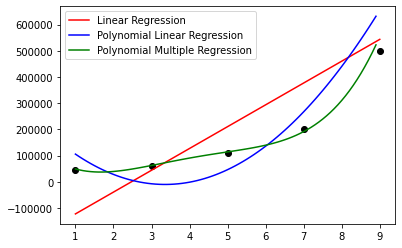

In [122]:
plt.scatter(values,out , color = "black")
values_grid = np.arange(min(values.values) , max(values.values) , 0.1)
values_grid = values_grid.reshape((len(values_grid) , 1))
plt.plot(values.values,lm_pred.values , color ="red" , label = "Linear Regression")
plt.plot(values_grid,lm_2.predict(poly_reg.fit_transform(values_grid)) , color = "blue" , label = "Polynomial Linear Regression")
plt.plot(values_grid,lm_3.predict(poly_reg2.fit_transform(values_grid)) , color = "green" , label = "Polynomial Multiple Regression")
plt.legend()